# MNIST-Keras-NN

The following script executes a program for digit recognition on the mnist database using Keras Multi-layer Perceptron classifier

In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import os

%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

import config

### Configurations
# Training-Size
num_train = config.num_train                   # 60000 for full data set 
num_test  = config.num_test                    # 10000 for full data set

In [2]:
# Simple function to log information
path = os.getcwd()+"/log"
logDir = os.path.exists(path)
if not logDir:
    os.makedirs(path)

training_results = path+"/keras-nn-training-log.txt"
def log_training_results(*s):
    with open(training_results, 'a') as f:
        for arg in s:
            print(arg, file=f)
            print(arg)

print("Generated data will be located in ", training_results)
log_training_results("[%s] on (%s, %s) using (Train: %s, Test: %s)" % (datetime.now(), config.os, config.cpu, config.num_train, config.num_test))


Generated data will be located in  c:\Users\auerth\Desktop\Study\MNIST_Digits_Benchmark\src/log/keras-nn-training-log.txt
[2022-09-12 16:11:48.148642] on (Windows-10-10.0.19044-SP0, Intel64 Family 6 Model 140 Stepping 1, GenuineIntel) using (Train: 15000, Test: 2500)


In [3]:
# Fetch MNIST-Data from Keras repository
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Display (Train) (Test) datasets
print("Shape of training data:\t\t", X_train.shape)
print("Shape of training labels:\t", y_train.shape)
print("Shape of testing data:\t\t", X_test.shape)
print("Shape of testing labels:\t", y_test.shape)

# i.e.: We have 60000 images with a size of 28x28 pixels


Shape of training data:		 (60000, 28, 28)
Shape of training labels:	 (60000,)
Shape of testing data:		 (10000, 28, 28)
Shape of testing labels:	 (10000,)


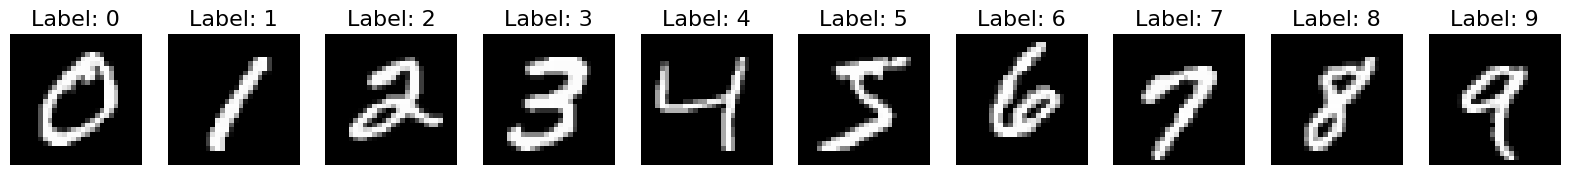

In [5]:
# Visualize some examples
num_classes = 10 # 0 .. 9
f, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(0, num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)
  ax[i].axis('off')

In [6]:
# Reshape the data such that we have access to every pixel of the image
# The reason to access every pixel is that only then we can apply deep learning ideas and can assign color code to every pixel.
train_data = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
train_label = y_train.astype("float32")

test_data = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')
test_label = y_test.astype("float32")

In [7]:
# We know the RGB color code where different values produce various colors. It is also difficult to remember every color combination. 
# We already know that each pixel has its unique color code and also we know that it has a maximum value of 255. 
# To perform Machine Learning, it is important to convert all the values from 0 to 255 for every pixel to a range of values from 0 to 1.
train_data = train_data / 255
test_data = test_data / 255

In [8]:
# Force the amount of columns to fit the necessary sizes required by the neural network
train_label = keras.utils.to_categorical(train_label, num_classes)
test_label = keras.utils.to_categorical(test_label, num_classes)

In [9]:
# As an optional step, we decrease the training and testing data size, such that the algorithms perform their execution in acceptable time
train_data = train_data[1:num_train,]
train_label = train_label[1:num_train]

test_data = test_data[1:num_test,]
test_label = test_label[1:num_test]

In [10]:
# Display (Train) (Test) datasets

print("Reshaped training data:\t\t", train_data.shape)
print("Reshaped training labels:\t", train_label.shape)
print("Reshaped testing data:\t\t", test_data.shape)
print("Reshaped testing labels:\t", test_label.shape)

# As we can see: We now have X images with 784 pixels in total
# We now operate on this data

Reshaped training data:		 (14999, 784)
Reshaped training labels:	 (14999, 10)
Reshaped testing data:		 (2499, 784)
Reshaped testing labels:	 (2499, 10)


## Multi-layer Perceptron classifier

For more information, see: https://keras.io/guides/sequential_model/ 

In [11]:
# Create model: https://keras.io/guides/sequential_model/
model = Sequential()

# Create model layers
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# Additional learning configurations
batch_size = 512
epochs=10


In [13]:
# Train model
start_time = time.time()
model.fit(x=train_data, y=train_label, batch_size=batch_size, epochs=epochs)
end_time = time.time() - start_time

params = {"Keras":{}}
log_training_results("Trained new model: %s in %s seconds" % (params, end_time))


Epoch 1/10
30/30 [==============================] - 0s 3ms/step - loss: 1.3177 - accuracy: 0.6208
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4798 - accuracy: 0.8517
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3373 - accuracy: 0.9024
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.2818 - accuracy: 0.9163
Epoch 5/10
30/30 [==============================] - 0s 5ms/step - loss: 0.2342 - accuracy: 0.9307
Epoch 6/10
30/30 [==============================] - 0s 5ms/step - loss: 0.2011 - accuracy: 0.9422
Epoch 7/10
30/30 [==============================] - 0s 5ms/step - loss: 0.1764 - accuracy: 0.9483
Epoch 8/10
30/30 [==============================] - 0s 5ms/step - loss: 0.1540 - accuracy: 0.9557
Epoch 9/10
30/30 [==============================] - 0s 5ms/step - loss: 0.1422 - accuracy: 0.9595
Epoch 10/10
30/30 [==============================] - 0s 5ms/step - loss: 0.1257 - accuracy: 0.9630
Trained new model: 

In [14]:
# Evaluate model based on supplied tags
start_time = time.time()
test_loss, test_acc = model.evaluate(train_data, train_label)
end_time = time.time() - start_time

log_training_results("\tPredicting train data -- execution time: %ss" % (end_time))
log_training_results("\t[%s] -- Accuracy: %s; Loss: %s" % (params, test_acc, test_loss))  

469/469 [==============================] - 1s 1ms/step - loss: 0.0875 - accuracy: 0.9761
	Predicting train data -- execution time: 0.8458025455474854s
	[{'Keras': {}}] -- Accuracy: 0.9761317372322083; Loss: 0.0874752476811409


In [15]:
# Evaluate model based on supplied tags
start_time = time.time()
test_loss, test_acc = model.evaluate(test_data, test_label)
end_time = time.time() - start_time

log_training_results("\tPredicting test data --  execution time: %ss" % (end_time))
log_training_results("\t[%s] -- Accuracy: %s; Loss: %s" % (params, test_acc, test_loss))  

79/79 [==============================] - 0s 1ms/step - loss: 0.2074 - accuracy: 0.9328
	Predicting test data --  execution time: 0.18301939964294434s
	[{'Keras': {}}] -- Accuracy: 0.9327731132507324; Loss: 0.2074277698993683


In [16]:
# Let model predict data
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

print(y_pred)
print(y_pred_classes)

79/79 [==============================] - 0s 1ms/step
[[4.7891322e-06 2.5049612e-04 9.9846894e-01 ... 2.7272159e-07
  1.1104334e-05 1.2753569e-08]
 [5.0235023e-05 9.9043286e-01 2.6192325e-03 ... 1.3155509e-03
  1.8577639e-03 8.6605185e-05]
 [9.9948263e-01 1.2023921e-06 2.4192312e-04 ... 6.1505081e-05
  1.4437294e-06 1.5414988e-05]
 ...
 [5.7559291e-06 1.8122200e-06 5.9869772e-06 ... 1.0047747e-04
  8.1922747e-03 8.5269737e-01]
 [3.4049735e-05 8.3148196e-05 7.0458962e-05 ... 5.4021989e-04
  1.4266776e-04 6.0789841e-03]
 [1.6240933e-06 2.5438356e-05 5.6366025e-05 ... 1.9875544e-05
  9.3481685e-06 4.2733803e-04]]
[2 1 0 ... 9 4 4]


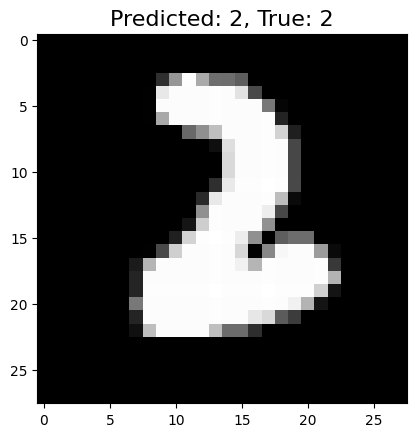

In [17]:
# View a correctly predicted datapoint
random_idx = np.random.choice(len(test_data))
x_sample = test_data[random_idx]
y_true = np.argmax(test_label, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

Text(0.5, 1.0, 'Confusion Matrix')

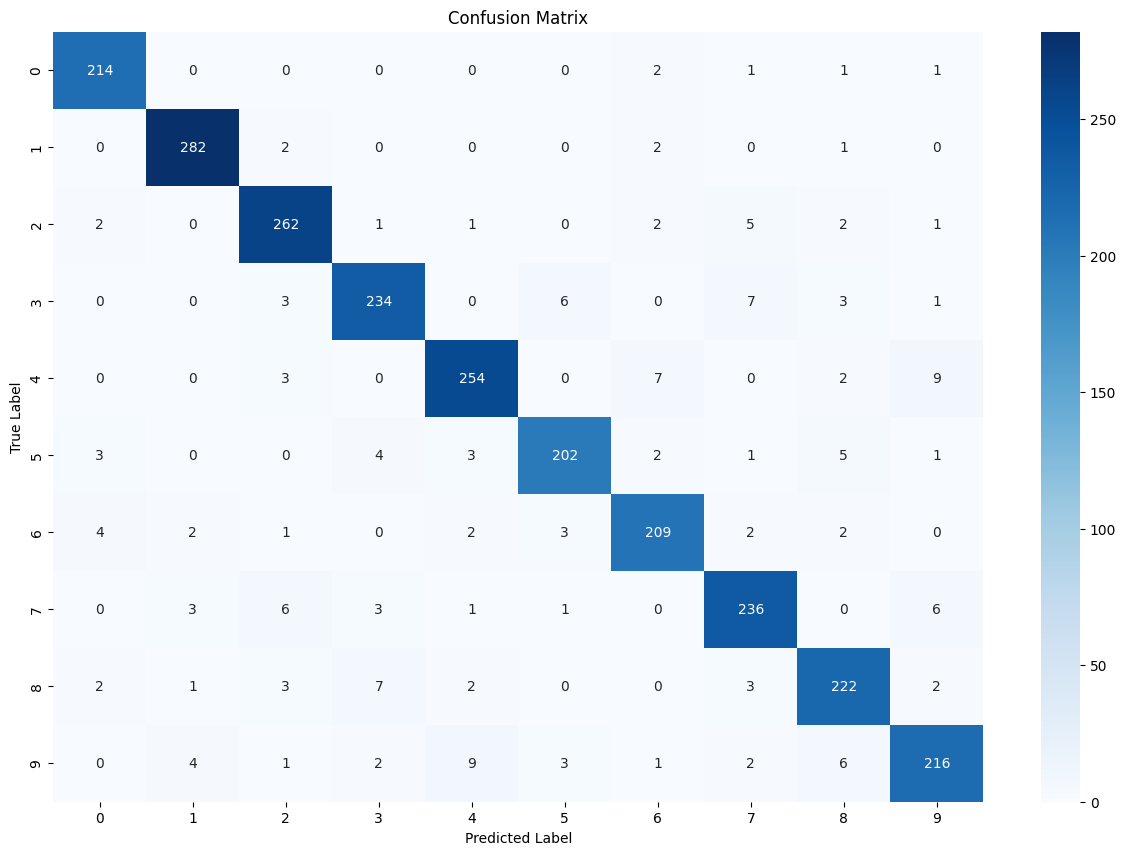

In [18]:
# Visualize estimation over correct and incorrect prediction via confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

In [19]:
# Review some Errors
# Create some sets of data
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = test_data[errors]

In [20]:
# Aggregate error set results
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

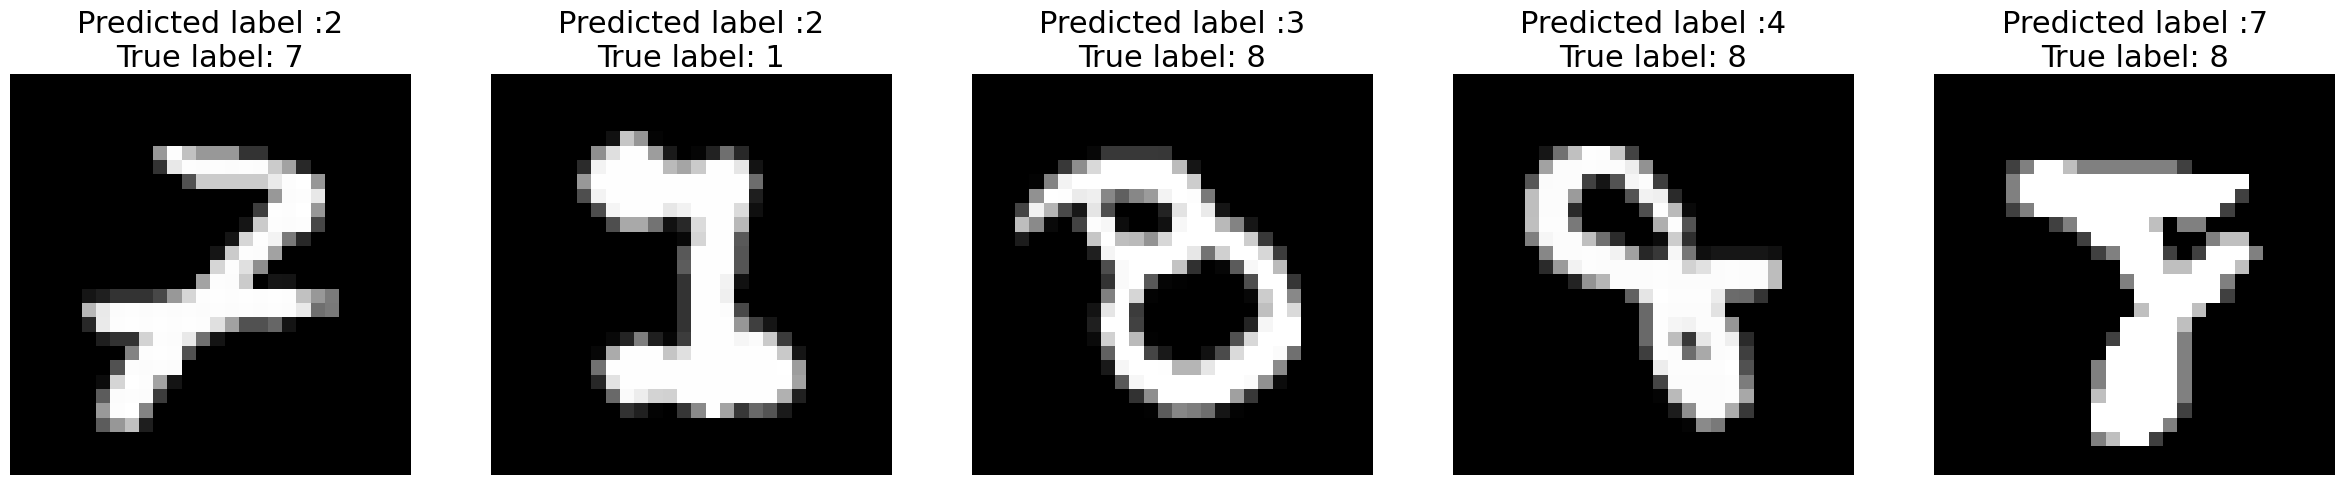

In [21]:
# Show error points which were the most failing ones
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)
  ax[i].axis('off')